In [1]:
# Lasso and Ridge Regression
# ----------------------------------
#
# This function shows how to use Tensorflow to
# solve lasso or ridge regression.
# y = Ax + b
#
# We will use the iris data, specifically:
#  y = Sepal Length
#  x = Petal Width

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

Step #300 A = [[ 3.51111484]] b = [[ 0.29944518]]
Loss = [[ 104.36424255]]
Step #600 A = [[ 3.37744236]] b = [[ 0.91733825]]
Loss = [[ 104.38110352]]
Step #900 A = [[ 3.12137246]] b = [[ 1.38796139]]
Loss = [[ 102.77897644]]
Step #1200 A = [[ 2.87036657]] b = [[ 1.79044127]]
Loss = [[ 101.73019409]]
Step #1500 A = [[ 2.63844371]] b = [[ 2.13488364]]
Loss = [[ 101.17947388]]


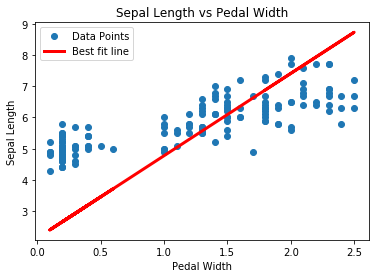

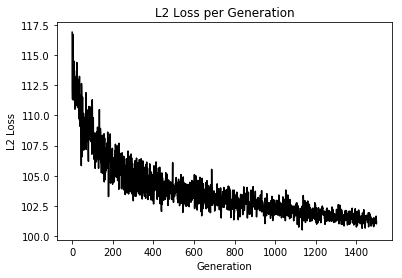

In [6]:
# Declare Lasso loss function
# Lasso Loss = L2_Loss + heavyside_step,
# Where heavyside_step ~ 0 if A < constant, otherwise ~ 99

lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-100., tf.subtract(A, lasso_param)))))
regularization_param = tf.multiply(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

# Declare the Ridge loss function
# Ridge loss = L2_loss + L2 norm of slope

# ridge_param = tf.constant(1.)
# ridge_loss = tf.reduce_mean(tf.square(A))
# loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)),
#                              tf.multiply(ridge_param, ridge_loss)), 0)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i + 1) % 300 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()
